Завдання 2

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from google.colab import files
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Завантажити датасет
data = files.upload()
df = pd.read_csv(next(iter(data)))

Saving Student_data.csv to Student_data (5).csv


In [53]:
#Реалізувати попередній аналіз даних:
#Роздрукувати перші 5 рядків.
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [54]:
#Вивести розмір датасета, типи даних.
df.dtypes

,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
ParentalEducation,int64
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64
ParentalSupport,int64
Extracurricular,int64


In [55]:
df.shape

(2392, 15)

In [56]:
#Перевірити на пропущені значення. При наявності замінити на середнє за стовпцем.
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [57]:
#Перевірити на дублікати. Якщо є – видалити.
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2387,False
2388,False
2389,False
2390,False


In [58]:
#Вивести описову статистику.
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [59]:
#Побудувати 3 моделі на вибір для визначення оцінки.
X = df.drop(['GradeClass'], axis=1)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# 1. Логістична регресія
logreg = LogisticRegression(max_iter=1000)
logreg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

logreg_grid = GridSearchCV(logreg, logreg_params, cv=5)
logreg_grid.fit(X_train, y_train)
logreg_best = logreg_grid.best_estimator_

# 2. Дерево рішень
tree = DecisionTreeClassifier(random_state=42)
tree_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

tree_grid = GridSearchCV(tree, tree_params, cv=5)
tree_grid.fit(X_train, y_train)
tree_best = tree_grid.best_estimator_

# 3. Метод опорних векторів (SVM)
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_

# Оцінка моделей
models = {'Logistic Regression': logreg_best, 'Decision Tree': tree_best, 'SVM': svm_best}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.7284122562674095
Decision Tree Accuracy: 0.924791086350975
SVM Accuracy: 0.8481894150417827


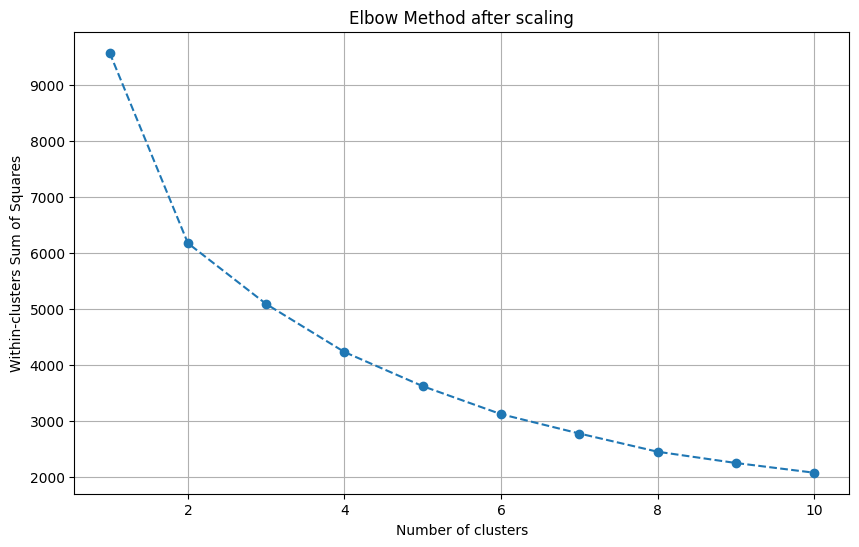

In [61]:
#Визначити методом ліктя і силуєтів оптимальну кількість кластерів.Візуалізувати кластери.
features = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]
scaler = StandardScaler()
X_scalerd = scaler.fit_transform(features)

wcss_2d = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X_scalerd)
  wcss_2d.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))
plt.plot(range(1,11), wcss_2d, marker='o', linestyle='--')
plt.title('Elbow Method after scaling')
plt.xlabel('Number of clusters')
plt.ylabel('Within-clusters Sum of Squares')
plt.grid(True)
plt.show()

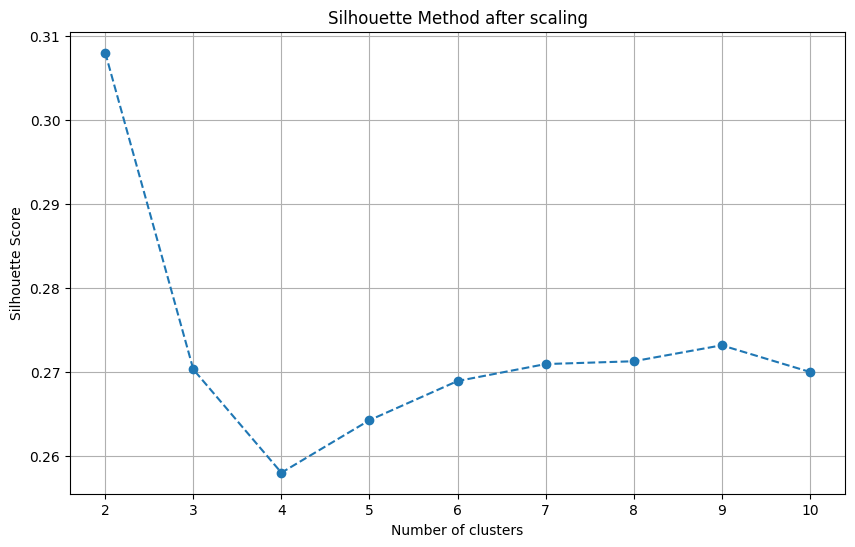

In [62]:
silhouette_scores = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  cluster_labels = kmeans.fit_predict(X_scalerd)
  silhouette_avg = silhouette_score(X_scalerd, cluster_labels)
  silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (10, 6))
plt.plot(range(2,11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method after scaling')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()